In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import requests
from PIL import Image
import io
np.random.seed(42)
tf.random.set_seed(42)

In [29]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [30]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [31]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

In [32]:
X_train.shape

(50000, 32, 32, 3)

In [33]:
X_test.shape

(10000, 32, 32, 3)

In [34]:
#Normalizing 
X_train = X_train.astype('float32') /255.0
X_test = X_test.astype('float32')/255.0

In [35]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

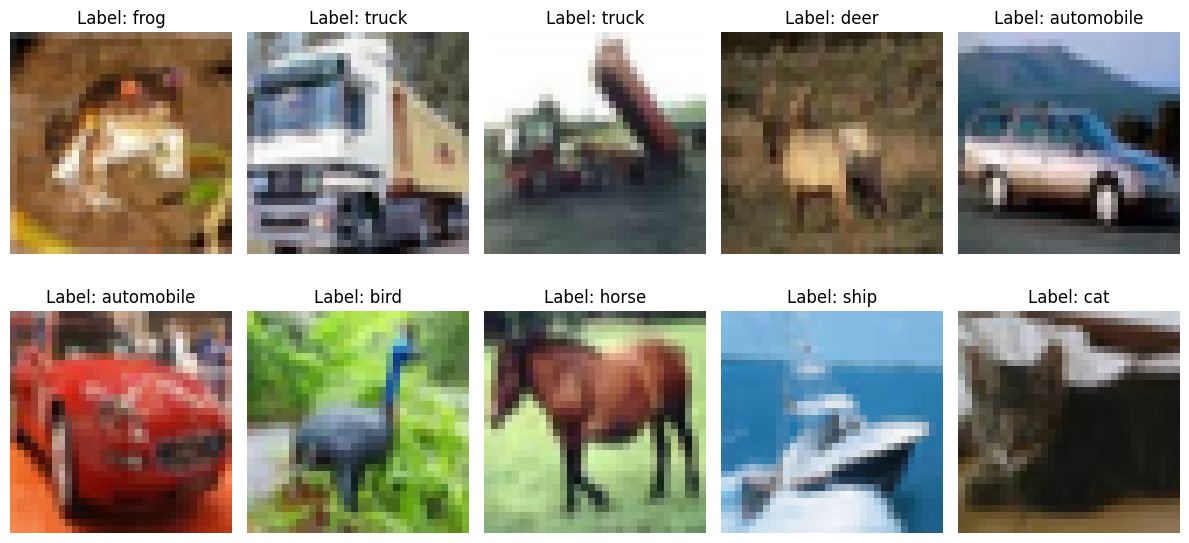

In [36]:
fig, axes = plt.subplots(2,5, figsize = (12,6))
for i in range(10):
    row = i // 5
    col = i % 5
    axes[row,col].imshow(X_train[i])
    axes[row,col].set_title(f'Label: {class_names[y_train[i][0]]}')
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()

In [43]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(32,32,3)),
    # learns features, edges, textures, shapes
    # each filter different features
    # kernel size (3,3)
    layers.BatchNormalization(), 
    layers.Conv2D(32, (3,3), activation = 'relu'), 
    layers.MaxPooling2D((2,2)), 
    
    #Pool size (2,2)
    layers.Dropout(0.25),
    #Randomly sets 25% of inputs to zero during training
    #improve generalization
    #force the model to not rely on specific neurons
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation = 'softmax')
    
])

In [44]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 814,506 (3.11 MB)

 Trainable params: 814,442 (3.11 MB)

 Non-trainable params: 64 (256.00 B)

In [45]:
model.compile(optimizer = 'adam', 
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [46]:
history = model.fit(X_train, y_train_cat, 
                   epochs = 5, 
                   batch_size = 200, 
                   validation_split=0.2,
                   verbose = 1)

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 25s 115ms/step - accuracy: 0.2089 - loss: 2.2332 - val_accuracy: 0.3920 - val_loss: 2.0394
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 24s 119ms/step - accuracy: 0.3857 - loss: 1.6432 - val_accuracy: 0.4700 - val_loss: 1.7346
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 27s 133ms/step - accuracy: 0.4451 - loss: 1.4904 - val_accuracy: 0.5521 - val_loss: 1.3792
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 26s 132ms/step - accuracy: 0.4833 - loss: 1.3887 - val_accuracy: 0.5815 - val_loss: 1.2423
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.4998 - loss: 1.3472 - val_accuracy: 0.5699 - val_loss: 1.2332


In [47]:
#Evaluation of the model on test data
test_loss, test_acc = model.evaluate(X_test , y_test_cat, verbose = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5774 - loss: 1.2308


In [57]:

def test_internet_image(url, model, class_names):
    """Test an image from the internet"""
    try:
        print(f"\nTesting image from: {url}")
        
        response = requests.get(url, timeout=10)
        image = Image.open(io.BytesIO(response.content))
        
        if image.mode != 'RGB':
            image = image.convert('RGB')
        image = image.resize((32, 32))
        
        image_array = np.array(image)
        image_array = image_array.astype('float32') / 255.0
        
        image_batch = np.expand_dims(image_array, axis=0)
        
        prediction = model.predict(image_batch)
        predicted_class = np.argmax(prediction)
        confidence = prediction[0][predicted_class]
        
        plt.figure(figsize=(8, 4))
        
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title('Original Image')
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(image)
        plt.title(f'Prediction: {class_names[predicted_class]}\nConfidence: {confidence:.3f}')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        print(f"Predicted: {class_names[predicted_class]} (Confidence: {confidence:.3f})")
        
        return predicted_class, confidence
        
    except Exception as e:
        print(f"Error: {e}")
        return None, None

In [64]:
test_url = [ "https://images.unsplash.com/photo-1583337130417-3346a1be7dee?w=400"]

Image1

Testing image from: https://images.unsplash.com/photo-1583337130417-3346a1be7dee?w=400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


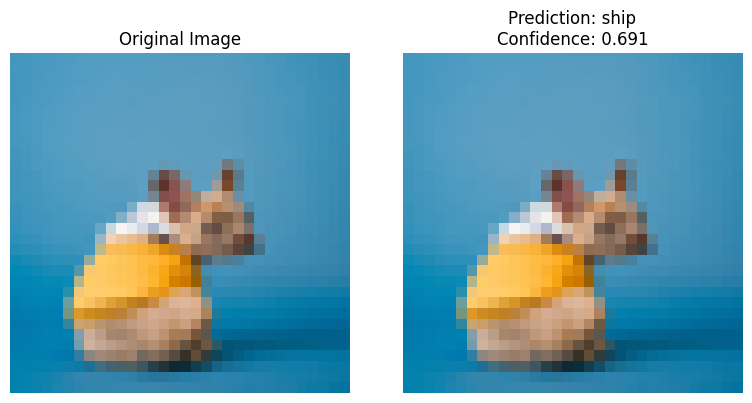

Predicted: ship (Confidence: 0.691)


In [65]:
for i, url in enumerate(test_url):
    print(f"Image{i+1}")
    test_internet_image(url,model,class_names)